# Самые прослушиваемые песни за 2024 год
- Предметная область: Стриминг сервисы. Анализ популярности треков и исполнителей, анализ количества плейлистов с представленными песнями и количество радио вещаний.
- Источник: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024?resource=download
- Тип данных: Реальные данные 4600 треков за 1987-2024 года.

Набор применим для:
- Регрессии: Анализ и прогнозирование популярности треков и исполнителей.
- Кластеризация: По кол-ву прослушиваний, кол-ву плейлистов и кол-ву радио-вещаний.

Атрибуты представленные в датаcете:

| Тип данных | Признак                    | Описание                                                          | Пример             |
|------------|----------------------------|-------------------------------------------------------------------|--------------------|
| object     | Track                      | Название песни.                                                   | Ginseng Strip 2002 |
| object     | Album Name                 | Название альбома, к которому относится песня.                     | Lavender - Single  |
| object     | Artist                     | Имя исполнителя(ей) песни.                                        | Yung Lean          |
| object     | Release Date               | Дата выпуска песни.                                               | 1/1/2013           |
| object     | ISRC                       | Международный стандартный код записи песни (ISRC).                | SEY491300006       |
| object     | All Time Rank              | Рейтинг песни по её общей популярности за всё время.              | 4,202              |
| float      | Track Score                | Оценка песни на основе различных факторов.                        | 20.6               |
| object     | Spotify Streams            | Общее количество прослушиваний на Spotify.                        | 276,992,369        |
| object     | Spotify Playlist Count     | Количество плейлистов Spotify, в которые включена песня.          | 105,690            |
| object     | Spotify Playlist Reach     | Охват песни через плейлисты на Spotify.                           | 11,367,953         |
| float      | Spotify Popularity         | Оценка популярности песни на Spotify.                             | 64.04              |
| object     | YouTube Views              | Общее количество просмотров официального видео песни на YouTube.  | 126,116,178        |
| object     | YouTube Likes              | Общее количество лайков под официальным видео песни на YouTube.   | 2,585,938          |
| object     | TikTok Posts               | Количество постов в TikTok с использованием этой песни.           | 8,515,109          |
| object     | TikTok Likes               | Общее количество лайков постов с песней в TikTok.                 | 1,684,766,527      |
| object     | TikTok Views               | Общее количество просмотров постов с песней в TikTok.             | 17,759,263,793     |
| object     | YouTube Playlist Reach     | Охват песни через плейлисты на YouTube.                           | 118,201,104        |
| float      | Apple Music Playlist Count | Количество плейлистов Apple Music, в которые включена песня.      | 10.0               |
| object     | AirPlay Spins              | Количество проигрываний песни на радиостанциях.                   | 393                |
| object     | SiriusXM Spins             | Количество проигрываний песни на SiriusXM.                        | 423                |
| float      | Deezer Playlist Count      | Количество плейлистов Deezer, в которые включена песня.           | 12.0               |
| object     | Deezer Playlist Reach      | Охват песни через плейлисты на Deezer.                            | 66,615             |
| float      | Amazon Playlist Count      | Количество плейлистов Amazon Music, в которые включена песня.     | NaN                |
| object     | Pandora Streams            | Общее количество прослушиваний на Pandora.                        | 967,609            |
| object     | Pandora Track Stations     | Количество станций Pandora, где представлена песня.               | 4,145              |
| object     | Soundcloud Streams         | Общее количество прослушиваний на Soundcloud.                     | NaN                |
| object     | Shazam Counts              | Общее количество определений песни через Shazam.                  | 3,822,373          |
| object     | TIDAL Popularity           | Оценка популярности песни на TIDAL.                               | NaN                |
| object     | Explicit Track             | Указывает, содержит ли песня нецензурный контент.                 | 1                  |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(
    r"raw/Most Streamed Spotify Songs 2024.csv",
    encoding="utf-8", encoding_errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

Преобразуем тип данных objects в int, удаляем запятые, заполняем пропуски нулями

In [3]:
df = df.replace(',', '', regex=True)
df = df.fillna(0)
object_types = df.select_dtypes(include=['object']).columns
for obj in object_types:
    if df.columns.get_loc(obj) > 4:
        df[obj] = df[obj].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   int64  
 8   Spotify Playlist Count      4600 non-null   int64  
 9   Spotify Playlist Reach      4600 non-null   int64  
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   int64  
 12  YouTube Likes               4600 non-null   int64  
 13  TikTok Posts                4600 

### Анализ и обработка данных
Объединим все прослушивания в общее количество прослушиваний, также поступим со всеми плейлистами и радио-вещаниями, и заменим их.
Также удалим не нужные столбцы, так как они не предоставляют нам никакой полезной информации.

In [4]:
drops = ['TIDAL Popularity', 'ISRC', 'Artist', 'Album Name', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
         'YouTube Views', 'YouTube Likes', 'All Time Rank']

df = df.drop(drops, axis=1)

streams = ['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'Spotify Playlist Reach',
           'YouTube Playlist Reach', 'Deezer Playlist Reach']
playlists = ['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']
broadcasts = ['Pandora Track Stations', 'AirPlay Spins', 'SiriusXM Spins']

df['Total streams'] = df[streams].sum(axis=1)
df['Total playlists'] = df[playlists].sum(axis=1)
df['Total broadcasts'] = df[broadcasts].sum(axis=1)

for i in streams, playlists, broadcasts:
    df = df.drop(i, axis=1)

df['Total playlists'] = df['Total playlists'].astype(int)
df.head(3)

,Track,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts
0,MILLION DOLLAR BABY,4/26/2024,725.4,92.0,2669262,0,778121394,31102,64590
1,Not Like Us,5/4/2024,545.9,92.0,1118279,1,679506905,28479,69225
2,i like the way you kiss me,3/19/2024,538.4,92.0,5285340,0,1235255026,54829,80508


In [21]:
# Top 5 most streamed songs, playlists and broadcasts
df_top = df.copy()
df_top['Top streams'] = (df_top['Total streams'] / df_top['Total streams'].max()) * 100
df_top['Top playlists'] = (df_top['Total playlists'] / df_top['Total playlists'].max()) * 100
df_top['Top broadcasts'] = (df_top['Total broadcasts'] / df_top['Total broadcasts'].max()) * 100
df_top = df_top.sort_values('Top streams', ascending=False)

print("Топ 5 самых прослушиваемых песен:")
print(df_top.sort_values('Top streams', ascending=False).head(5)[['Track', 'Top streams', 'Total streams']])

print("Топ 5 самых популярных песен по количеству в плейлистах:")
print(df_top.sort_values('Top playlists', ascending=False).head(5)[['Track', 'Top playlists', 'Total playlists']])

print("Топ 5 самых популярных песен по количеству радио-вещаний:")
print(df_top.sort_values('Top broadcasts', ascending=False).head(5)[['Track', 'Top broadcasts', 'Total broadcasts']])

Топ 5 самых прослушиваемых песен:
                        Track  Top streams  Total streams
19                  As It Was   100.000000    10906837613
87                 Easy On Me    76.805005     8376997154
70                 Heat Waves    74.650608     8142020607
26  STAY (with Justin Bieber)    71.586848     7807861279
55            Blinding Lights    66.332325     7234759017
Топ 5 самых популярных песен по количеству в плейлистах:
                          Track  Top playlists  Total playlists
55              Blinding Lights     100.000000           591999
70                   Heat Waves      82.263990           487002
26    STAY (with Justin Bieber)      76.442528           452539
815             Sweater Weather      70.263970           415962
4522    Smells Like Teen Spirit      69.374104           410694
Топ 5 самых популярных песен по количеству радио-вещаний:
                                             Track  Top broadcasts  \
1373                      Those Oldies but Goodie

Заменим полную дату выхода песни на её год.

In [6]:
df['Release Date'] = df['Release Date'].str.split('/').str[-1].astype(int)
df.head(2)

,Track,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts
0,MILLION DOLLAR BABY,2024,725.4,92.0,2669262,0,778121394,31102,64590
1,Not Like Us,2024,545.9,92.0,1118279,1,679506905,28479,69225


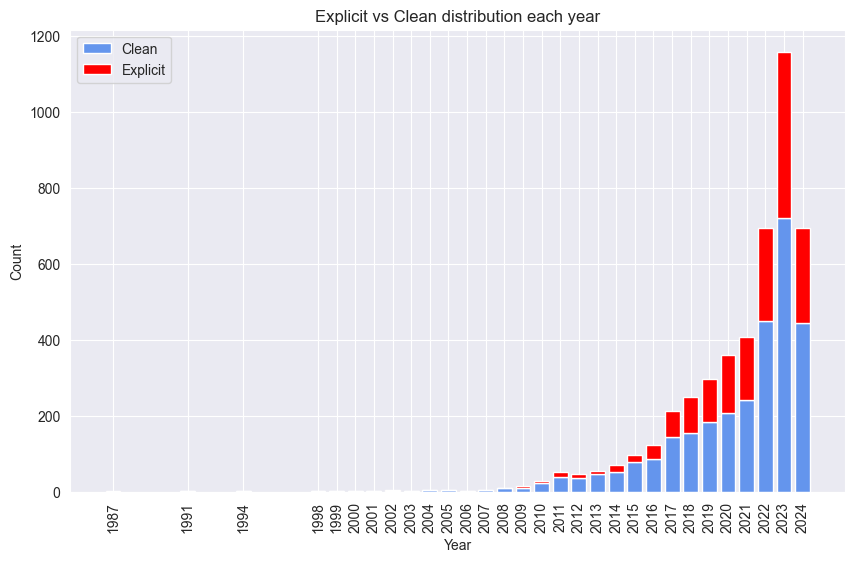

In [7]:
year_explicit = df.groupby(['Release Date', 'Explicit Track']).size().unstack(fill_value=0).reset_index()
year_explicit_copy = year_explicit.copy()
year_explicit_copy.rename(columns={False: 'Clean', True: 'Explicit'}, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(year_explicit_copy['Release Date'], year_explicit_copy['Clean'], label='Clean', color='cornflowerblue')
plt.bar(year_explicit_copy['Release Date'], year_explicit_copy['Explicit'], bottom=year_explicit_copy['Clean'],
        label='Explicit',
        color='red')
plt.title('Explicit vs Clean distribution each year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(year_explicit_copy['Release Date'], rotation=90)
plt.show()

### Матрица корреляции. Зависимость признаков

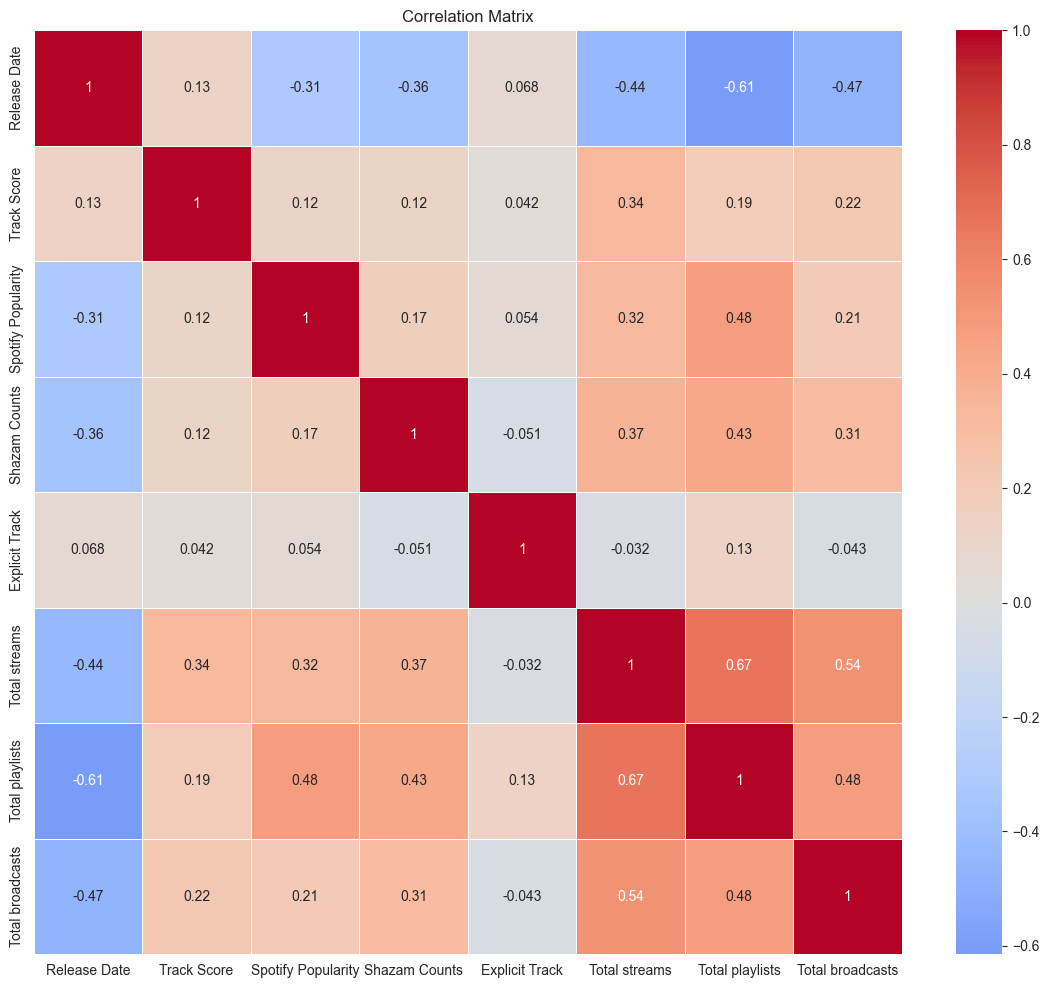

,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts
Release Date,1.000000,0.126693,-0.312654,-0.362295,0.067988,-0.442723,-0.614629,-0.468872
Track Score,0.126693,1.000000,0.116876,0.119933,0.041801,0.335937,0.188388,0.222922
Spotify Popularity,-0.312654,0.116876,1.000000,0.170612,0.053805,0.319027,0.479850,0.210757
Shazam Counts,-0.362295,0.119933,0.170612,1.000000,-0.051426,0.365254,0.425950,0.312402
Explicit Track,0.067988,0.041801,0.053805,-0.051426,1.000000,-0.031763,0.127020,-0.043320
Total streams,-0.442723,0.335937,0.319027,0.365254,-0.031763,1.000000,0.668154,0.535977
Total playlists,-0.614629,0.188388,0.479850,0.425950,0.127020,0.668154,1.000000,0.481370
Total broadcasts,-0.468872,0.222922,0.210757,0.312402,-0.043320,0.535977,0.481370,1.000000


In [8]:
plt.figure(figsize=(14, 12))
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

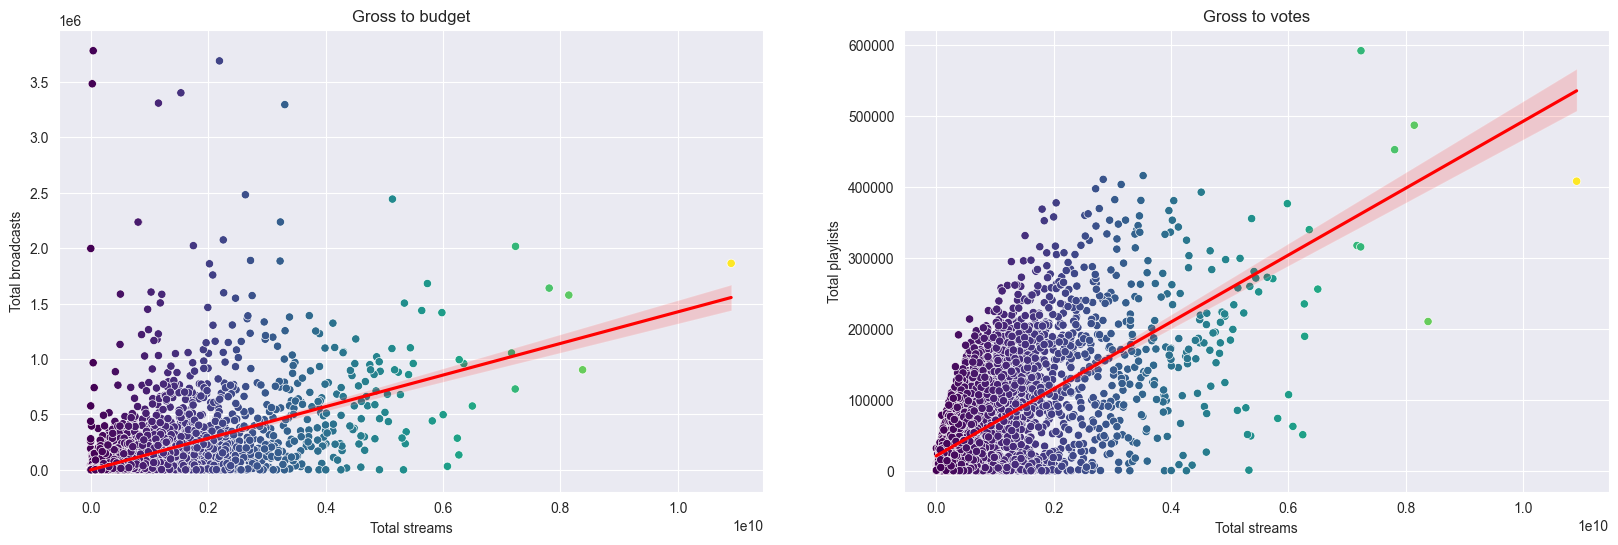

In [9]:
plt.figure(figsize=(20, 6))

# Plot: Total streams/Total broadcasts.
plt.subplot(1, 2, 1)
sns.scatterplot(x='Total streams', y='Total broadcasts', data=df, hue=df['Total streams'], legend=False,
                palette='viridis')
sns.regplot(x='Total streams', y='Total broadcasts', data=df, scatter=False, color='red')
plt.title('Gross to budget')

# Plot: Total streams/Total playlists.
plt.subplot(1, 2, 2)
sns.scatterplot(x='Total streams', y='Total playlists', data=df, hue=df['Total streams'], legend=False,
                palette='viridis')
sns.regplot(x='Total streams', y='Total playlists', data=df, scatter=False, color='red')
plt.title('Gross to votes')

plt.show()

*Выводы:*
- Чем сильнее растёт количество прослушиваний, тем больше количество радио-вещаний и плейлистов с этими песнями.
- Отдельно можно выделить по матрице корреляции, чем больше радио-вещаний, тем больше плейлистов с этими песнями и количество песен, которые были найдены через Shazam.

### Кластеризация, категоризация и подбор числа кластеров

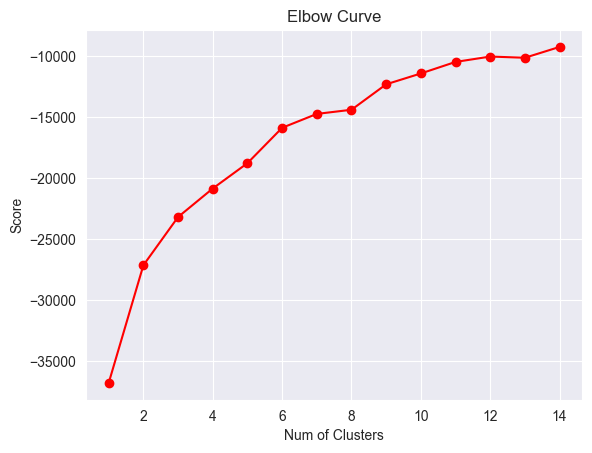

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Get numerical features.
df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)

# Search for optimal k.
k_range = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in k_range]
score = [kmeans[i - 1].fit(df_numeric).score(df_numeric) for i in k_range]

# Show kmeans.
plt.plot(k_range, score, marker='o', color='red')
plt.xlabel('Num of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [11]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(numeric_data)
len(kmeans.labels_)

4600

In [12]:
df_clusters = df.copy()
df_clusters['Cluster'] = kmeans.labels_
df_clusters.head()

,Track,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts,Cluster
0,MILLION DOLLAR BABY,2024,725.4,92.0,2669262,0,778121394,31102,64590,3
1,Not Like Us,2024,545.9,92.0,1118279,1,679506905,28479,69225,3
2,i like the way you kiss me,2024,538.4,92.0,5285340,0,1235255026,54829,80508,3
3,Flowers,2023,444.9,85.0,11822942,0,5733982818,270670,1680365,1
4,Houdini,2024,423.3,88.0,457017,1,393630334,7592,19192,0


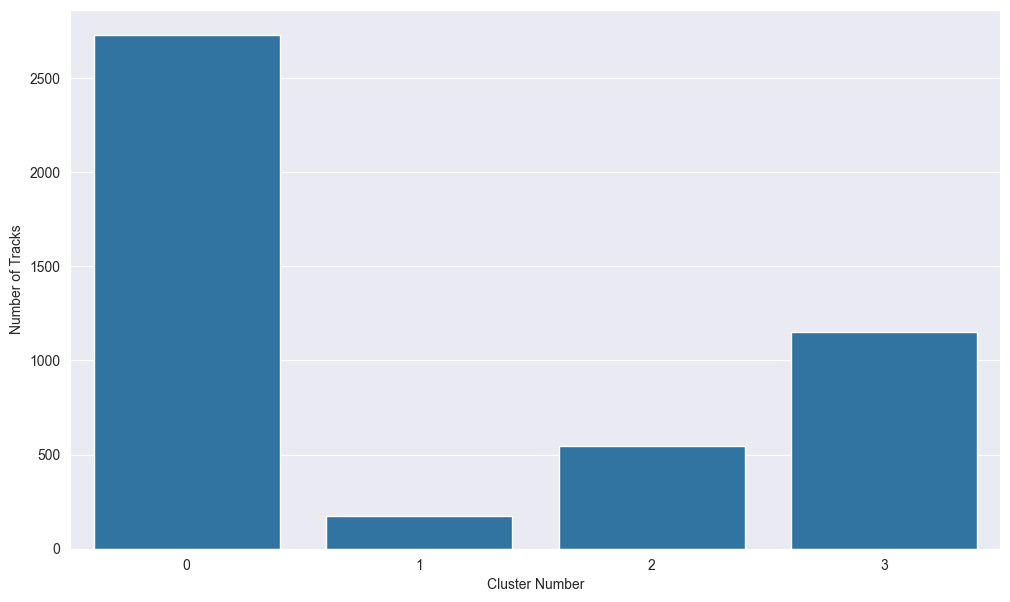

In [13]:
plt.figure(figsize=(12, 7))
axis = sns.barplot(
    x=np.arange(0, num_clusters, 1),
    y=df_clusters.groupby(['Cluster']).count()['Total streams'].values
)
x = axis.set_xlabel('Cluster Number')
y = axis.set_ylabel('Number of Tracks')

In [14]:
df_numeric = df_clusters.select_dtypes(include=[np.number])
df_numeric = df_numeric.groupby('Cluster').mean().round(2)

for cluster, count in df_clusters['Cluster'].value_counts().sort_index().items():
    print(f'Cluster #{cluster} size: {count}')

df_numeric


Cluster #0 size: 2727
Cluster #1 size: 172
Cluster #2 size: 548
Cluster #3 size: 1153


,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts
Cluster,,,,,,,,
0,2022.06,34.82,44.81,854113.47,0.37,2.172969e+08,24713.18,29387.42
1,2017.86,90.08,72.43,8518556.22,0.26,4.358467e+09,187809.82,593098.98
2,2017.15,56.50,62.25,5724265.77,0.35,2.152102e+09,134102.02,319288.96
3,2019.27,44.29,62.70,2813103.58,0.36,9.970637e+08,83508.85,140937.94


Можно увидеть следующие группы:
- №0: Самый большой кластер - песни в среднем 2022 года с самым низким рейтингом и низкой популярностью.
- №1: Наименьший кластер - песни в среднем 2017 года с высоким рейтингом и высокой популярностью, также с самым низким количеством Explicit песен. 
- №2: Небольшой кластер - песни в среднем 2017 года со средним рейтингом и средней популярностью. 
- №3: Большой кластер - песни в среднем 2019 года с небольшим рейтингом и с самой высокой популярностью по количеству прослушиваний.

In [15]:
# Cluster №0
df_view = df_clusters.drop(columns=['Track Score', 'Total playlists', 'Total broadcasts'])
df_view[df_view['Cluster'] == 0].sample(5)

,Track,Release Date,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Cluster
3835,Mon ami,2023,0.0,19456,1,9489,0
924,Tattoo,2020,58.0,713534,0,529099368,0
682,Papa,2022,0.0,0,0,2908705,0
3355,Girls Just Wanna Have Some,2024,0.0,0,0,51035638,0
144,Abc,2023,1.0,1178,0,36967,0


In [16]:
# Cluster №1
df_view[df_view['Cluster'] == 1].sample(5)

,Track,Release Date,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Cluster
1404,Cooped Up (with Roddy Ricch),2022,62.0,1443587,1,3520360220,1
592,There's Nothing Holdin' Me Back,2016,80.0,14902121,0,4132474454,1
126,I Ain't Worried,2022,83.0,9091826,0,4488630091,1
2523,Out of Time,2021,70.0,1722436,0,3495535591,1
1405,FRIENDS,2015,70.0,11299124,1,3702353863,1


In [17]:
# Cluster №2
df_view[df_view['Cluster'] == 2].sample(5)

,Track,Release Date,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Cluster
2062,Maps,2014,79.0,157957,0,2782864037,2
1549,Nice For What,2018,72.0,6416734,1,1607530944,2
2009,One More Night,2012,73.0,10178659,0,3156791573,2
1727,Outside (feat. Ellie Goulding),2011,79.0,10713096,0,1696600303,2
1115,Ride,2015,79.0,0,0,1974662292,2


In [18]:
# Cluster №3
df_view[df_view['Cluster'] == 3].sample(5)

,Track,Release Date,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Cluster
3295,La Gozadera,2011,69.0,4595901,0,1011886070,3
1796,Don't Go Yet,2021,62.0,3990487,0,1461460544,3
1447,The London (feat. J. Cole & Travis Scott),2019,62.0,2792929,1,1083151611,3
2249,Clout (feat. Cardi B),2019,58.0,2066390,1,696369513,3
3353,Old Days,2024,0.0,96017,1,861399332,3


In [19]:
df

,Track,Release Date,Track Score,Spotify Popularity,Shazam Counts,Explicit Track,Total streams,Total playlists,Total broadcasts
0,MILLION DOLLAR BABY,2024,725.4,92.0,2669262,0,778121394,31102,64590
1,Not Like Us,2024,545.9,92.0,1118279,1,679506905,28479,69225
2,i like the way you kiss me,2024,538.4,92.0,5285340,0,1235255026,54829,80508
3,Flowers,2023,444.9,85.0,11822942,0,5733982818,270670,1680365
4,Houdini,2024,423.3,88.0,457017,1,393630334,7592,19192
...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,2017,19.4,71.0,656337,1,380957322,65775,13190
4596,Dil Meri Na Sune,2018,19.4,56.0,193590,0,78706102,4604,412
4597,Grace (feat. 42 Dugg),2020,19.4,65.0,1135998,1,310357453,72092,29203
4598,Nashe Si Chadh Gayi,2016,19.4,66.0,448292,0,184822440,14045,1200


Таким образом можно наблюдать группу разных по популярности и рейтингу песен. Разницу между этими группами можно наблюдать в количестве прослушиваний, плейлистов и радио-вещаний, также по рейтингу и популярности, от самой низкой до самой высокой. Самый большой кластер с песнями, где наименьший рейтинг и низкая популярность по прослушиваниям.